<div class="alert alert-block alert-success">
    
<p><b><h1>Two-Way Movie/Show Recommender System Project</h1></b><p>
<b>This project develops a Two-Way Movie/Show Recommender System, an application designed to cater to diverse user preferences in movie selection.
<p>The system operates in two distinct modes:<p>

<p>Popular Genre Recommendations: The first mode targets users interested in following mainstream trends. It recommends the top 10 most popular and highly rated shows within a selected genre, aligning with the preferences of users who enjoy widely acclaimed content.<p>

    
<p>Discovery of Underrated Shows: The second mode is crafted for users seeking unique and lesser-known content. It suggests three shows similar to a user-selected show, focusing on high-quality but less popular options. This mode aims to surface hidden gems that might otherwise go unnoticed.<p>

</b>

    
</div>

<div class="alert alert-block alert-success">
    <p><b><h2>Part 1: Popular Genre Recomendation</h2></b><p>
</div>

<div class="alert alert-block alert-success">
    <p><b>First, the dataset extracted from Kaggle is imported </b>(https://www.kaggle.com/datasets/snehaanbhawal/netflix-tv-shows-and-movie-list/data)<p>
   
</div>

In [374]:
import pandas as pd

In [375]:
#reading the file
df=pd.read_csv('netflix_list.csv')

<div class="alert alert-block alert-success">

<b> Data Cleaning/Preprocessing operations</b>

</div>

In [376]:
#dropping the irrelevant columns
columns_to_drop= ['episodes','certificate', 'startYear', 'endYear', 'runtime','orign_country', 'image_url','cast','isAdult']
df.drop(columns=columns_to_drop,inplace=True)

In [377]:
df.head(1)

,imdb_id,title,popular_rank,type,language,plot,summary,rating,numVotes,genres
0,tt4052886,Lucifer,1.0,tvSeries,English,Lucifer Morningstar has decided he's had enough of being the dutiful servant in Hell and decides to spend some time on Earth to better understand humanity. He settles in Los Angeles - the City of Angels.,"Lucifer Morningstar, bored from his sulking life in hell, comes to live in Los Angeles. While there, he helps humanity with its miseries through his experience and telepathic abilities to bring people's deepest desires and thoughts out of them. While meeting with a Detective in his nightclub (Lux), a shootout involving him and the Detective leads him to become an LAPD consultant who tries to punish people for their crimes through law and justice. —ahmetkozan",8.1,250884.0,"Crime,Drama,Fantasy"


<div class="alert alert-block alert-success">
<b> Since, in this part of the project, we want to build a genre based recommendation system, we modify the genre column from a string to a list to extract different genres from it </b>
</div>

In [378]:
def find_genre (l):
    my_list= l.split(",")
    lowercase_list = [item.lower() for item in my_list]
    return lowercase_list
    
df['genres_updated']=df['genres'].map(find_genre)

<div class="alert alert-block alert-success">
<b> We have popularity rank in our data set, so we will combine that with the rating to make recommendations based on the genre. </b>
    <b> The idea is that we recommend the most popular movies/shows in the genre that user enters </b>
</div>

<div class="alert alert-block alert-success">
    <b> Calculate the 95th percentile of the popularity rank because we're interested in the top 5% movies/shows</b>
</div>

In [379]:
import pandas as pd
percentile_95 = df['popular_rank'].quantile(0.05)

<div class="alert alert-block alert-success">
<b>Filter the top 5% movies/shows based on the popularity rank</b>
</div>

In [380]:
top_movies=df[df['popular_rank'] <= percentile_95]

<div class="alert alert-block alert-success">
    <b> Also, we want to only recommend movies/shows with high ratings (Rating >= 7/10) </b>

</div>

In [381]:
top_movies=top_movies[top_movies['rating']>=7]

In [382]:
top_movies=top_movies.reset_index(drop=True)

In [383]:
top_movies['genres_updated']

0           [crime, drama, fantasy]
1                   [comedy, drama]
2                 [comedy, romance]
3          [action, drama, fantasy]
4                 [crime, thriller]
                   ...             
255          [action, crime, drama]
256    [adventure, comedy, romance]
257      [animation, comedy, drama]
258         [action, drama, sci-fi]
259          [action, crime, drama]
Name: genres_updated, Length: 260, dtype: object

<div class="alert alert-block alert-success">
<b> Extracting list of available genres</b>
</div>

In [384]:
gen_lis=[]
def get_genres_list(l):
    for i in l:
        if i not in gen_lis:
            gen_lis.append(i)
    
call=top_movies['genres_updated'].map(get_genres_list)

<div class="alert alert-block alert-success">
   <p> <b> We now implement the recommendation function which takes genre as the input and returns top 10 shows/movies in that genre.<p>

</div>

In [408]:
print('Select a genre from the list below:')
for i in (gen_lis):
    print(i)
a=input('enter the genre you want to watch: ')

Select a genre from the list below:
crime
drama
fantasy
comedy
romance
action
thriller
adventure
mystery
horror
music
animation
biography
history
sci-fi
family
sport
musical
war
western
enter the genre you want to watch: Comedy


In [409]:
def get_first_10_movies_by_genre(df, genre):
    # Ensure the genre is in lowercase for a case-insensitive comparison
    genre = genre.lower()
    
    # Initialize an empty list to store indices of matching rows
    matching_indices = []

    # Iterate over the DataFrame
    for index, genres in enumerate(df['genres_updated']):
        # Check if the specified genre is in the current list of genres
        if genre in genres:
            matching_indices.append(index)
            # Break the loop if we have found 10 matches already
            if len(matching_indices) == 10:
                break

    # Filter the DataFrame to get rows at the matching indices
    df_filtered = df.loc[matching_indices]
    
    return df_filtered

recommended_movies = get_first_10_movies_by_genre(top_movies, a)
recommended_movies= recommended_movies.sort_values('rating', ascending=False)[['title', 'rating', 'plot']]
recommended_movies

,title,rating,plot
2,Friends,8.9,Follows the personal and professional lives of six twenty to thirty-something-year-old friends living in Manhattan.
13,Bo Burnham: Inside,8.9,"A new comedy special shot and performed by Bo Burnham, alone, over the course of the past year."
15,"Love, Death & Robots",8.5,"A collection of animated short stories that span various genres including science fiction, fantasy, horror and comedy."
27,Schitt's Creek,8.5,"When rich video-store magnate Johnny Rose and his family suddenly find themselves broke, they are forced to leave their pampered lives to regroup in Schitt's Creek."
26,Modern Family,8.4,Three different but related families face trials and tribulations in their own uniquely comedic ways.
30,Brooklyn Nine-Nine,8.4,"Comedy series following the exploits of Det. Jake Peralta and his diverse, lovable colleagues as they police the NYPD's 99th Precinct."
24,Master of None,8.3,"The personal and professional life of Dev, a 30-year-old actor in New York."
40,How I Met Your Mother,8.3,A father recounts to his children - through a series of flashbacks - the journey he and his four best friends took leading up to him meeting their mother.
1,The Kominsky Method,8.2,"An aging actor, who long ago enjoyed a brush with fame, makes his living as an acting coach."
14,The Mitchells vs the Machines,7.8,"A quirky, dysfunctional family's road trip is upended when they find themselves in the middle of the robot apocalypse and suddenly become humanity's unlikeliest last hope."


<div class="alert alert-block alert-success">
<p><b><h2>Part 2: Discovery of Underrated Shows</h2></b></p>
</div>

In [392]:
#reading the file
df=pd.read_csv('netflix_list.csv')

<div class="alert alert-block alert-success">

<b> Data Cleaning/Preprocessing operations</b>

</div>

In [393]:
#dropping the irrelevant columns
columns_to_drop= ['episodes','certificate', 'startYear', 'endYear', 'runtime','orign_country', 'image_url','cast','isAdult']
df.drop(columns=columns_to_drop,inplace=True)

In [394]:
def find_genre (l):
    my_list= l.split(",")
    lowercase_list = [item.lower() for item in my_list]
    return lowercase_list

df['genres_updated']=df['genres'].map(find_genre)

In [395]:
df.dropna(subset=['numVotes'], inplace=True)

<div class="alert alert-block alert-success">
    <p><b><h2>Text Processing</h2></b></p>

<p> <b>Tokenization: Split the text into words</b> <p>
    <p> <b>Cleaning: Remove unnecessary characters, punctuation, and convert text to lowercase</b> <p>
    <p> <b> Stop Word Removal: Remove common words that add little semantic value </b> <p>

</div>

In [396]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))


def clean_and_tokenize(text):
    # Convert text to lowercase
    
    text = text.lower()
    
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and apply stemming
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens

df['processed_summary'] = df['summary'].apply(clean_and_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anmolagrawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anmolagrawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-block alert-success">

<p><b> Now that we have processed summary with us, we vectorize the summary using word2vec. Pre-trained Word2Vec model is Google's model trained on the Google News dataset. Word2Vec is designed to capture semantic relationships between words based on their context in large text. </b><p>
    
</div>

In [33]:
import gensim.downloader as api

word2vec_model = api.load('word2vec-google-news-300')

In [397]:
import numpy as np

# Function to create a mean vector for a given summary
def create_mean_vector(tokenized_summary, model):
    vectors = [model[word] for word in tokenized_summary if word in model]
    if vectors:
        mean_vector = np.mean(vectors, axis=0)
    else:
        mean_vector = np.zeros(300)  # Vector size of Google's model is 300
    return mean_vector


df['summary_vector'] = df['processed_summary'].apply(lambda x: create_mean_vector(x, word2vec_model))

<div class="alert alert-block alert-success">
    
<p><b> Now, we perfrom one hot encoding on the genres_updated to categorise each genre </b> <p>
    
<p><b>Example:</b><p> 
    
<p>| Title  | Genres              <p>
|--------|-------------------------|
<p>| Show 1 | [Action, Comedy]     <p>
<p>| Show 2 | [Drama]              <p>
<p>Show 3 | [Action, Drama, Thriller] <p>
<p>Show 4 | [Sci-Fi, Thriller]      |<p>
    
After applying one-hot encoding to the 'Genres' column, the dataset will be transformed to look something like this:

| Title  | Action | Comedy | Drama | Sci-Fi | Thriller |
|--------|--------|--------|-------|--------|----------|
| Show 1 | 1      | 1      | 0     | 0      | 0        |
| Show 2 | 0      | 0      | 1     | 0      | 0        |
| Show 3 | 1      | 0      | 1     | 0      | 1        |
| Show 4 | 0      | 0      | 0     | 1      | 1        |

</div>

In [398]:
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler

# One-hot encode genres
mlb = MultiLabelBinarizer()
df['genre_vector'] = list(mlb.fit_transform(df['genres_updated']))

<div class="alert alert-block alert-success">
<b>
We'll combine the feature vectors from the processed summaries (Word2Vec vectors) and one-hot encoded genre vectors into a single feature vector for each show. This comprehensive feature vector will be used for similarity calculations in the recommendation system.
</div>

In [399]:

import numpy as np
import pandas as pd

# Function to combine the features
def combine_features(row):
    # Concatenate the summary vector and genre vector
    combined = np.concatenate((row['summary_vector'], row['genre_vector']))
    return combined

# Apply the function to each row in the DataFrame
df['combined_features'] = df.apply(combine_features, axis=1)

<div class="alert alert-block alert-success">
<b>Now that we have the combined feacture vector, we calculate the cosine similarity between movies</b> 
</div>

In [400]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your DataFrame 'df' has a column 'combined_features' with the combined feature vectors

# Convert the 'combined_features' column to a numpy array
feature_matrix = np.array(df['combined_features'].tolist())

# Compute the cosine similarity matrix
# This function computes the cosine similarity between all pairs of vectors in the feature_matrix
similarity_matrix = cosine_similarity(feature_matrix)


<div class="alert alert-block alert-success">
<b>Identifying Movies/Shows in Long Tail: We use the 'numVotes' column to identify the threshold.</b> 
</div>

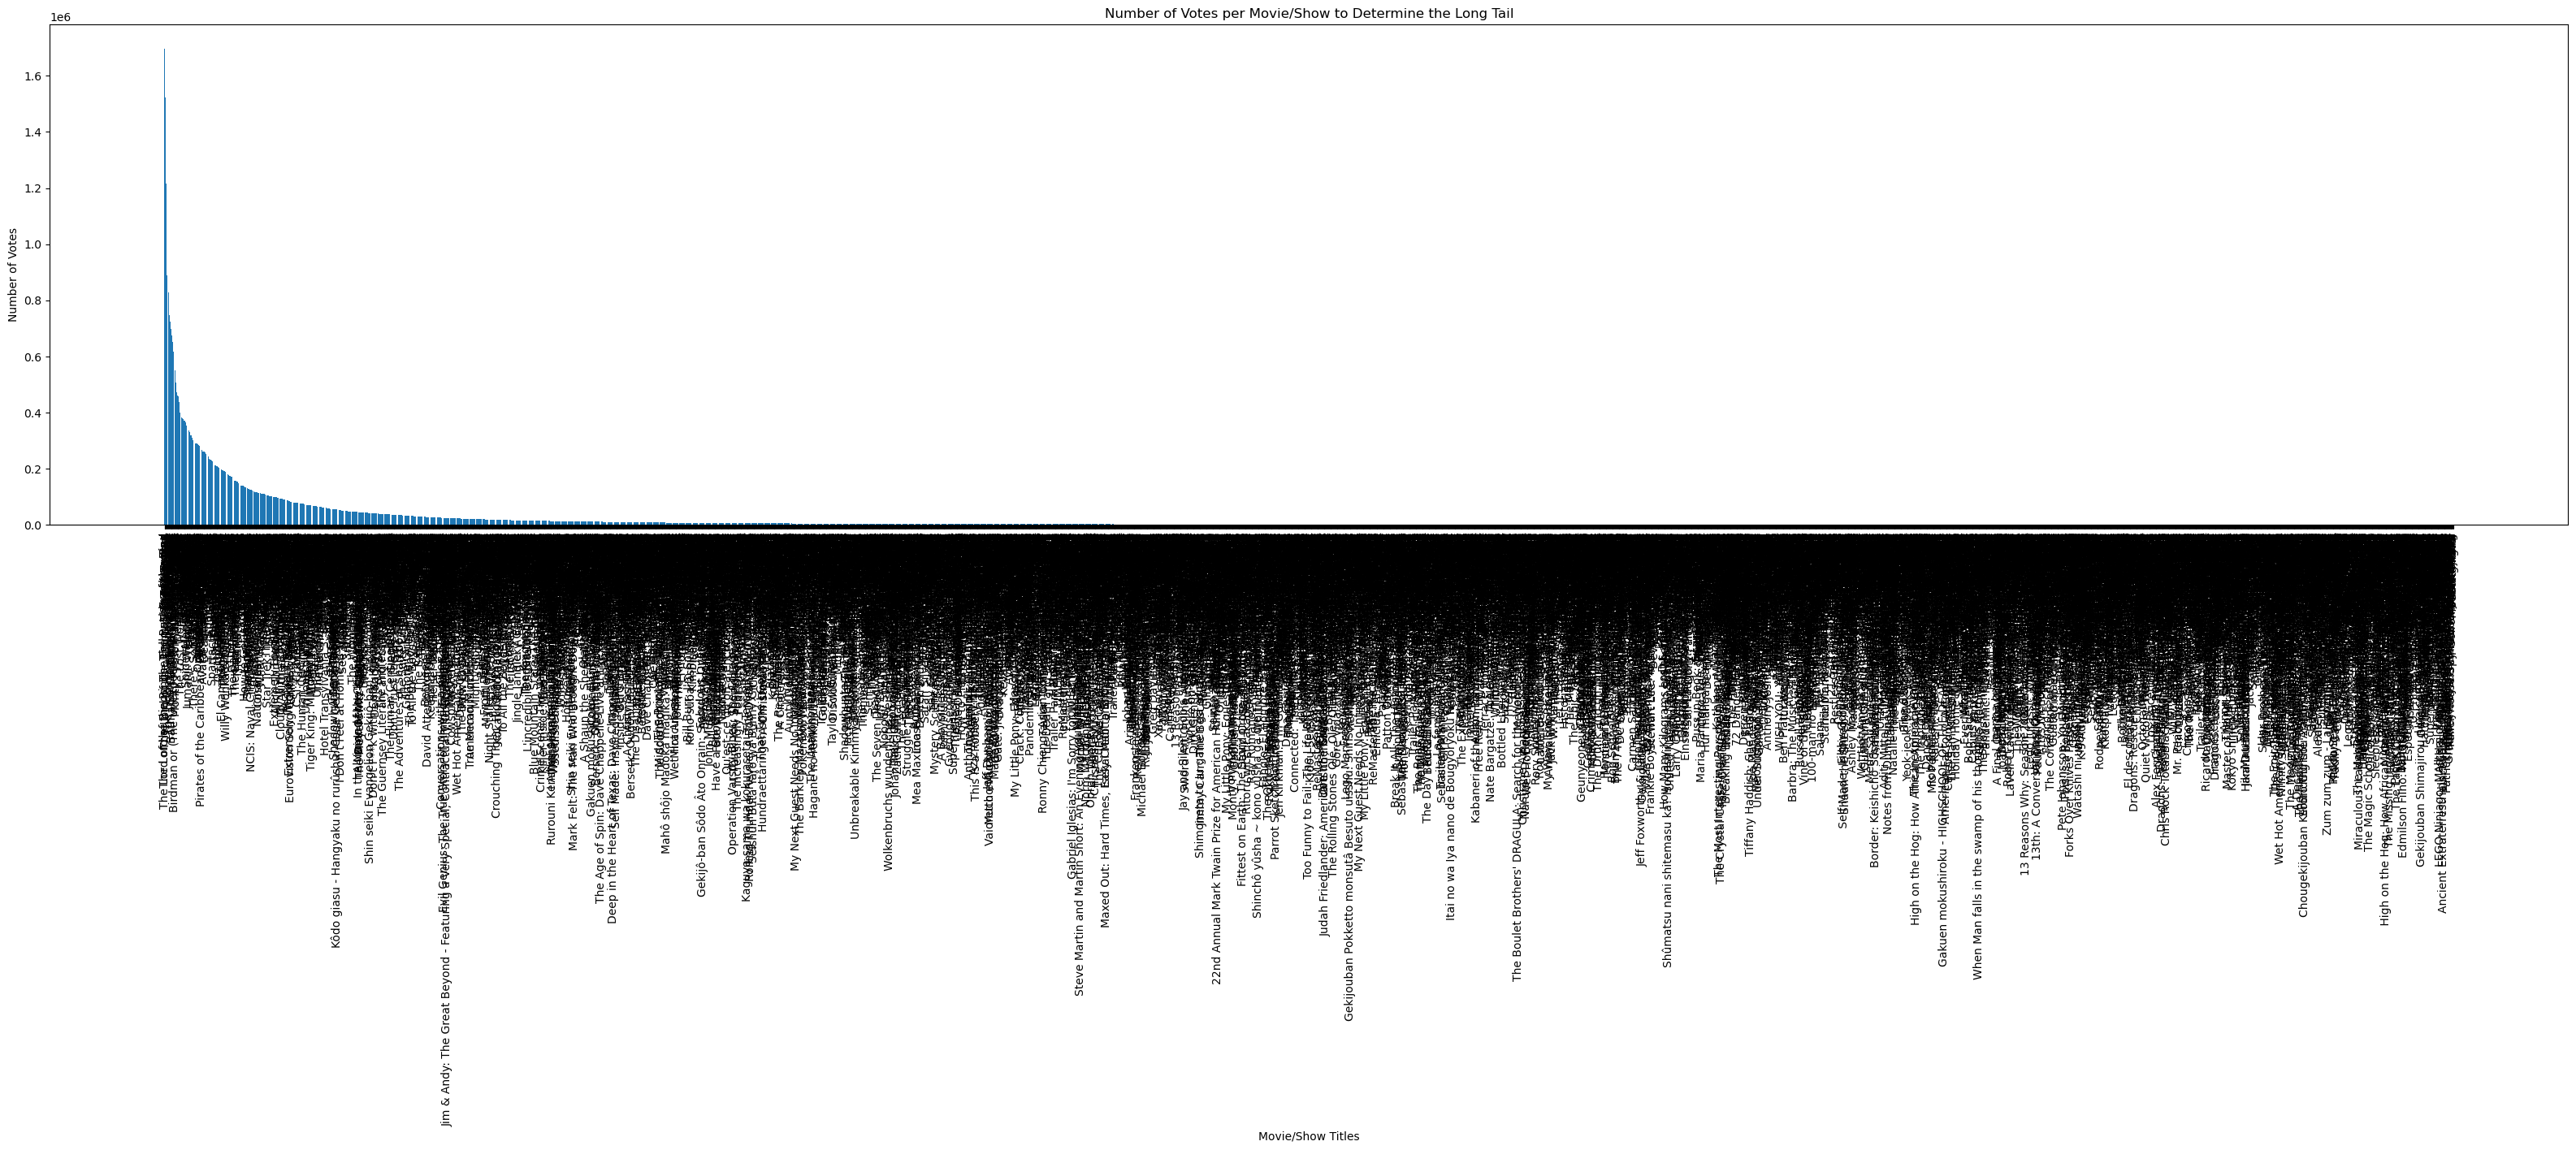

In [411]:
import matplotlib.pyplot as plt
sorted_df = df.sort_values('numVotes', ascending=True)
plt.figure(figsize=(40, 8))
plt.bar(sorted_df['title'], sorted_df['numVotes'])
plt.ylabel('Number of Votes')
plt.xlabel('Movie/Show Titles')
plt.title('Number of Votes per Movie/Show to Determine the Long Tail')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()# Rotate the x labels to show them vertically
plt.show()

<div class="alert alert-block alert-success">
<p><b>Visual Inspection of the above plot in Excel reveals an inflection point at close to 2000 votes.</b> <p>
<p><b> We use this to filter the dataframe to include only shows which have 2000 or less votes (less discovered shows). Additionally, we want to recommend shows which are highly rated. (Rating>=7)</b> <p>

</div>

In [403]:
m1=df['numVotes']<=2000
m2=df['rating']>=7
df_lt=df[m1&m2]
df_lt=df_lt.reset_index(drop=True)

In [404]:
df_lt.shape

(1485, 15)

<div class="alert alert-block alert-success">
<b> We have 1485 movies/shows in the long tail with high ratings and less votes. </b>
</div>

<div class="alert alert-block alert-success">
<b> Now, we write the recommendation function </b>
</div>

In [405]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np



def recommend_shows(show_title, df, df_lt, similarity_matrix, top_n=5):
    # Check if the show is in the main DataFrame
    if show_title not in df['title'].values:
        return pd.DataFrame({'Error': ["Show not found in the dataset."]})

    # Find the index of the show in the main DataFrame
    show_idx = df.index[df['title'] == show_title].tolist()[0]

    # Get the similarity scores for the given show with all other shows
    show_similarities = similarity_matrix[show_idx]

    # Create a DataFrame from similarities and filter by titles in df_lt
    similarity_df = pd.DataFrame({'title': df['title'], 'similarity': show_similarities})
    filtered_similarity_df = similarity_df[similarity_df['title'].isin(df_lt['title'])]

    # Sort and get top_n similar shows from the filtered DataFrame
    top_similar_shows = filtered_similarity_df.sort_values(by='similarity', ascending=False).iloc[1:top_n+1]

    # Merge with df_lt to get additional details like 'rating' and 'plot'
    recommendation_df = pd.merge(top_similar_shows, df_lt, on='title', how='left')[['title', 'rating', 'plot']]

    return recommendation_df

# Example usage
a = input("Enter the show/movie: ")
recommended_df = recommend_shows(a, df, df_lt, similarity_matrix, top_n=3)
df[df['title']==a][['title','rating','plot']]

Enter the show/movie: Dark


,title,rating,plot
71,Dark,8.8,"A family saga with a supernatural twist, set in a German town, where the disappearance of two young children exposes the relationships among four families."


In [406]:
print("Recommended Shows:")
recommended_df.sort_values(by='rating', ascending=False)

Recommended Shows:


,title,rating,plot
0,River,8.6,"As the fractured events of Stevie's murder start to swim into focus for River, the awful truth places more pressure than ever on his worsening state of mind. Can he carry on when so much is left unsaid?"
1,The Bletchley Circle: San Francisco,7.7,"Our four women delve into the mysterious death of Iris' suburban friend, uncovering a complex cluster of marriages built on lies and deception. In her quest to forge a new life, Millie must confront a long-lost cousin, w... Read all"
2,Collateral,7.3,"In South London a young man, Abdullah Asif (Sam Otto), is shot dead delivering a pizza. The detective in charge, DI Kip Glaspie (Carey Mulligan), quickly discovers that the pizza manager Laurie Stone (Hayley Squires), in... Read all"


In [42]:
#pd.set_option('display.max_colwidth', None)